In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/fraud/onlinefraud.csv")

In [3]:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
# check missing values

df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
# Exploring transaction type

print(df.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


Text(0, 0.5, 'Number of Transactions')

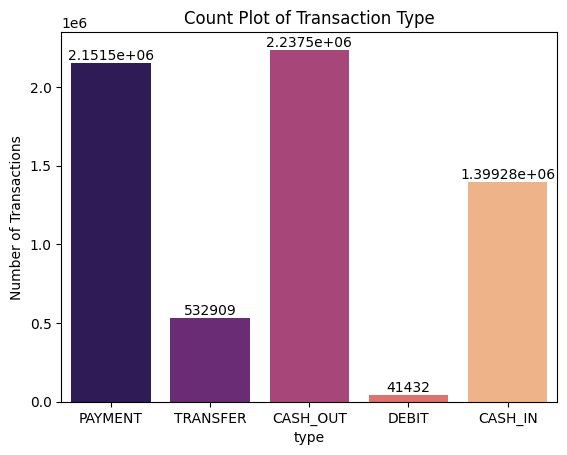

In [6]:
ax = sns.countplot(x='type', data=df, palette='magma')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count Plot of Transaction Type')
plt.ylabel('Number of Transactions')

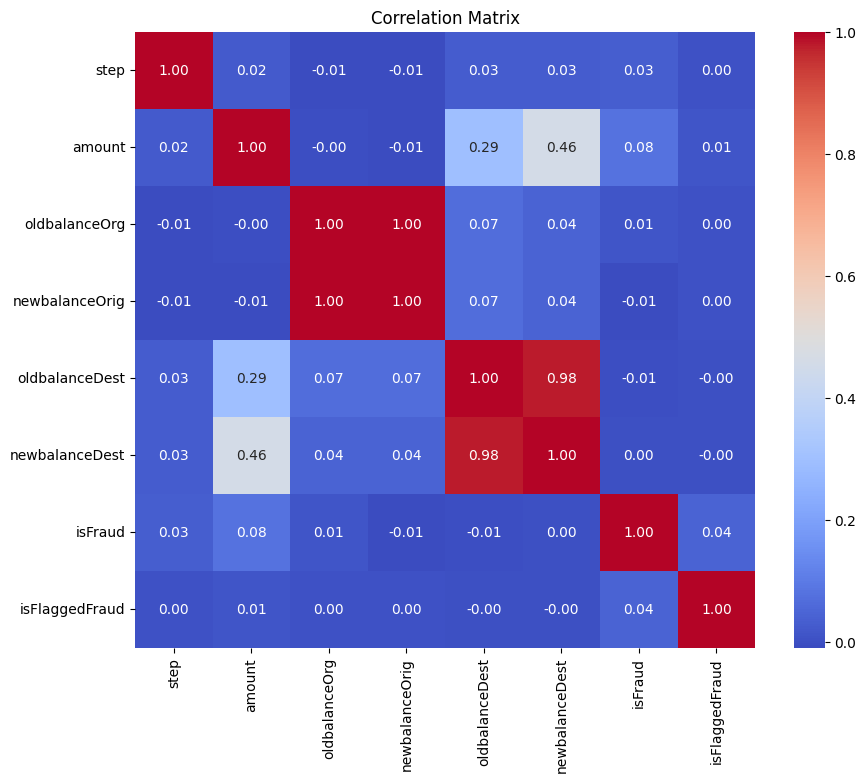

In [7]:
# Create a correlation matrix
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


<Axes: xlabel='step', ylabel='Count'>

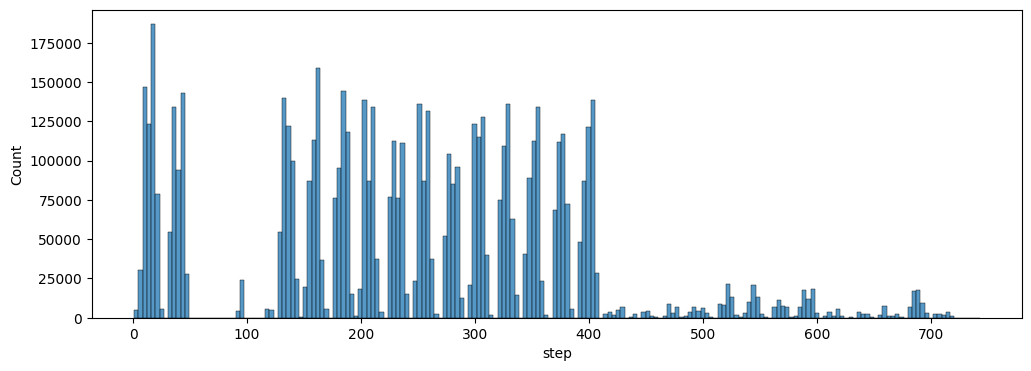

In [8]:
plt.figure(figsize=(12, 4))
sns.histplot(df['step'], bins=200)

Text(0, 0.5, 'Number of Transactions')

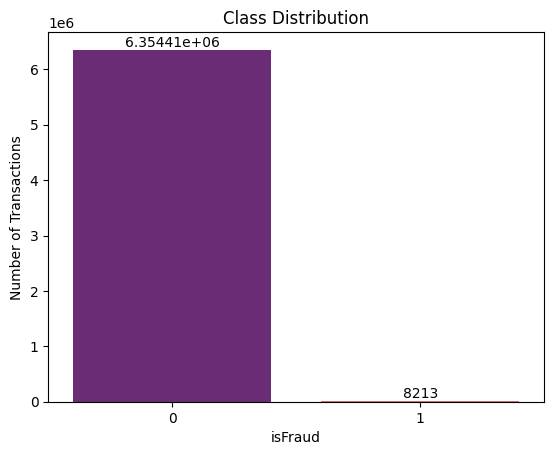

In [9]:
#plot the class distribution

ax = sns.countplot(x='isFraud', data=df, palette='magma')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Class Distribution')
plt.ylabel('Number of Transactions')


This is an extreemly high imbalance class data we will adopt the `Synthetic Minority Oversampling Technique`, or `SMOTE` for short method for balancing the class

In [10]:
#label encode column type
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
# drop column step, nameOrig, nameDest, isFlaggedFraud

df.drop(columns=['step', 'nameOrig', 'nameDest', 'isFlaggedFraud'], inplace=True)
df.head()


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,4,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,3,11668.14,41554.0,29885.86,0.0,0.0,0


Original dataset shape: (6362620, 7)
Resampled dataset shape: (12708814, 6)


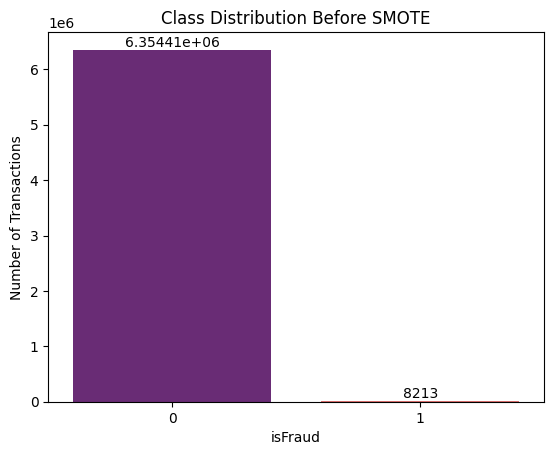

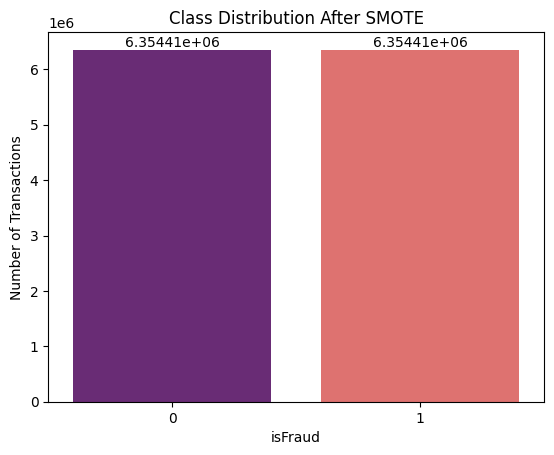

In [12]:
# apply smote algorith on. the dataset isFraud is the target
# and plt before and after

X = df.drop('isFraud', axis=1)
y = df['isFraud']

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X, y)

print(f"Original dataset shape: {df.shape}")
print(f"Resampled dataset shape: {X_train.shape}")

# plot class distribution before smote
ax = sns.countplot(x='isFraud', data=df, palette='magma')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Class Distribution Before SMOTE')
plt.ylabel('Number of Transactions')
plt.show()

# plot class distribution after smote
ax = sns.countplot(x='isFraud', data=pd.DataFrame(y_train), palette='magma')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Class Distribution After SMOTE')
plt.ylabel('Number of Transactions')
plt.show()


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
scaler= StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


[1.71356611e+00 1.79962661e+05 8.35596812e+05 8.56854477e+05
 1.10130067e+06 1.22563976e+06]


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

In [16]:
# Initialize models with default parameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'XGBoost': XGBClassifier()
}


In [17]:
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])


In [ ]:
for name in tqdm(models.keys(), desc='Training Models'):
    # Train and evaluate models
    model = models[name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    # Append metrics to the DataFrame
    metrics_df = metrics_df.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc
    }, ignore_index=True)

Training Models: 100%|██████████| 5/5 [56:20<00:00, 557.50s/it]

In [21]:
# Print metrics table
metrics_df.head()

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Decision Tree,0.999716,0.893604,0.885436,0.889501,0.942650
1,Random Forest,0.999679,0.958333,0.784887,0.862982,0.994138
2,Gradient Boosting,0.999445,0.962413,0.592931,0.733786,0.889509
3,Extra Trees,0.999683,0.957164,0.789762,0.865442,0.994347
4,XGBoost,0.999657,0.953313,0.771481,0.852812,0.999772


Models Progress:   0%|          | 0/5 [00:00<?, ?it/s]

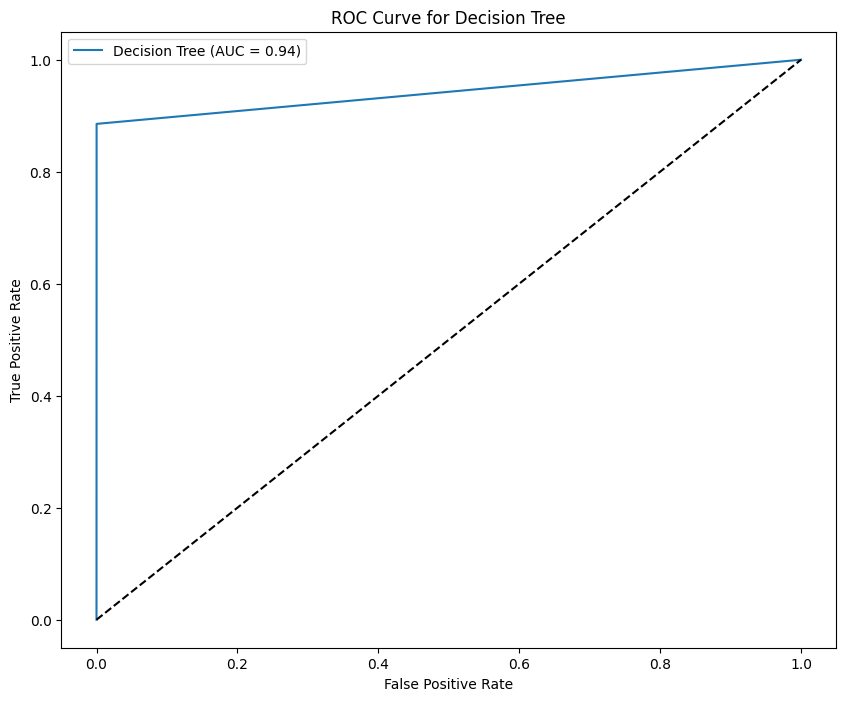

Models Progress:  20%|██        | 1/5 [00:00<00:02,  1.36it/s]

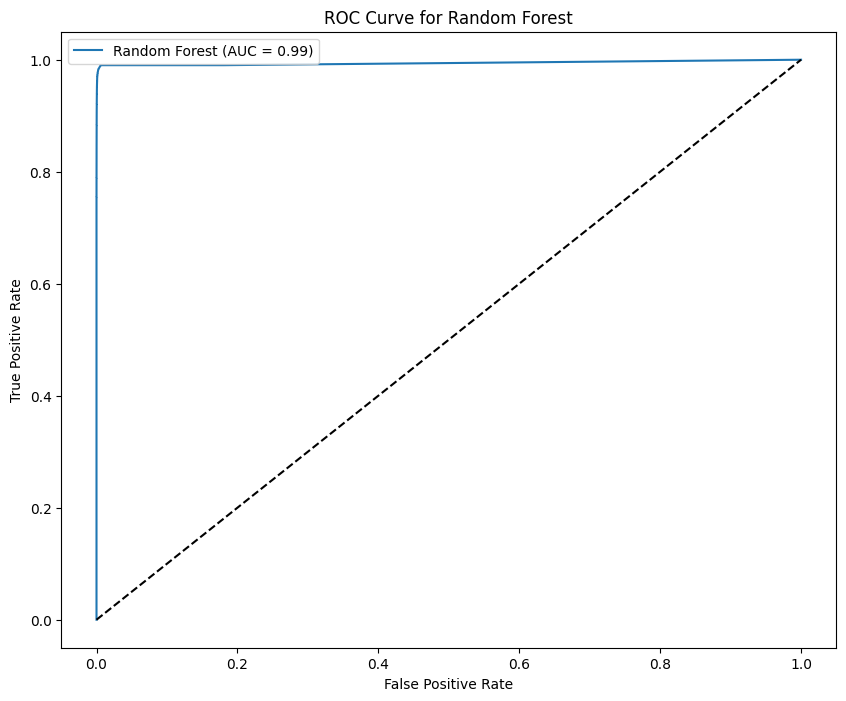

Models Progress:  40%|████      | 2/5 [00:20<00:34, 11.66s/it]

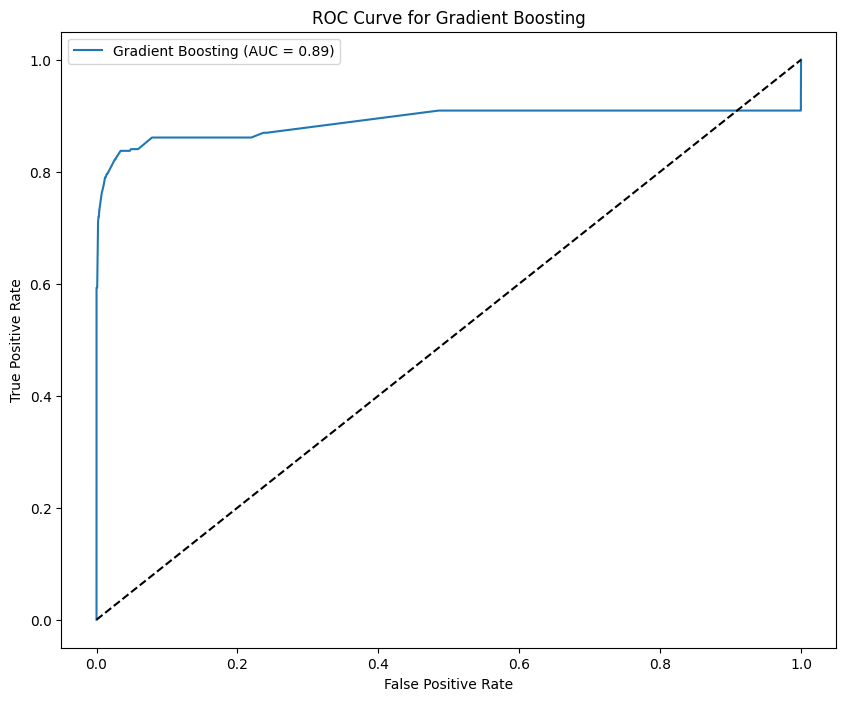

Models Progress:  60%|██████    | 3/5 [00:22<00:15,  7.66s/it]

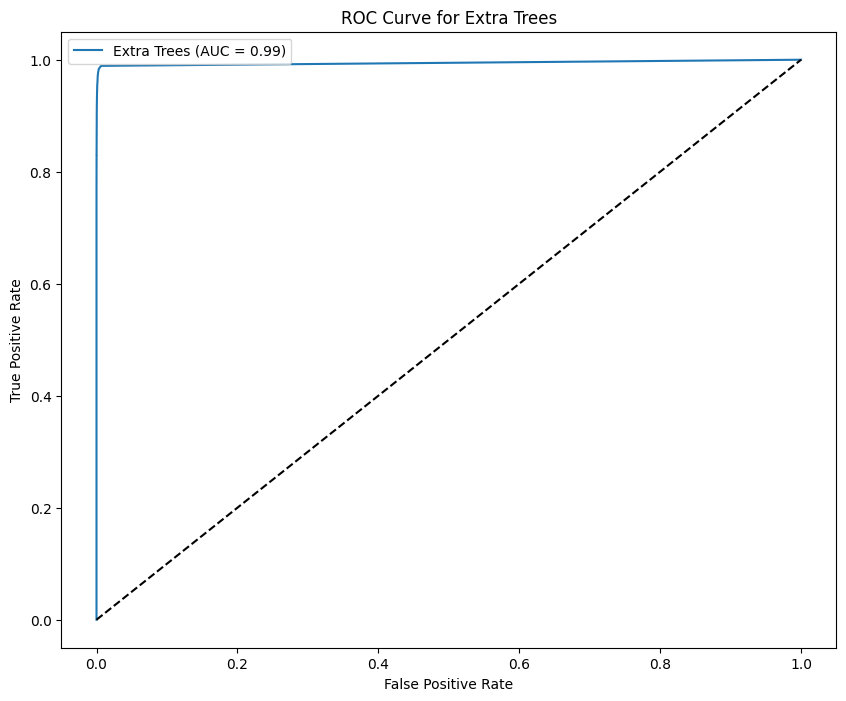

Models Progress:  80%|████████  | 4/5 [00:41<00:12, 12.11s/it]

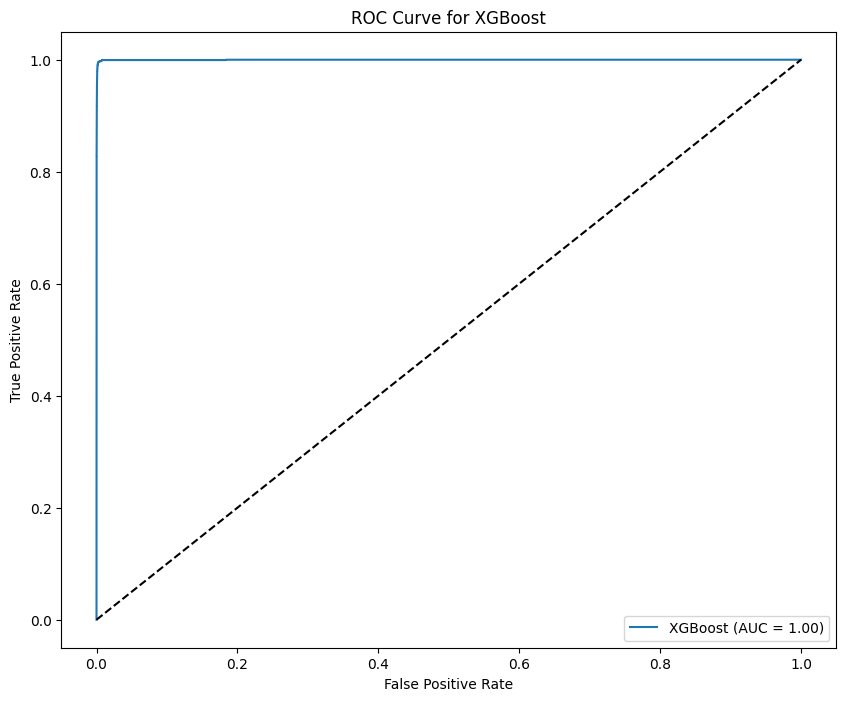

Models Progress: 100%|██████████| 5/5 [00:48<00:00,  9.68s/it]


In [23]:
# Plotting ROC curves
for name, model in tqdm(models.items(), desc='Models Progress'):
    plt.figure(figsize=(10, 8))

    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend()

    plt.show()

Models Progress:   0%|          | 0/5 [00:00<?, ?it/s]

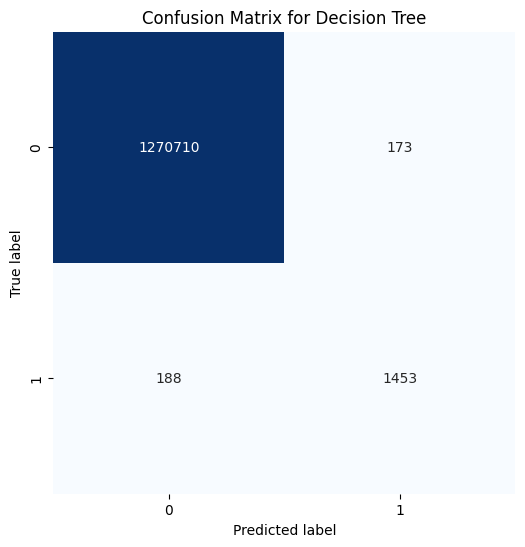

Models Progress:  20%|██        | 1/5 [00:01<00:06,  1.56s/it]

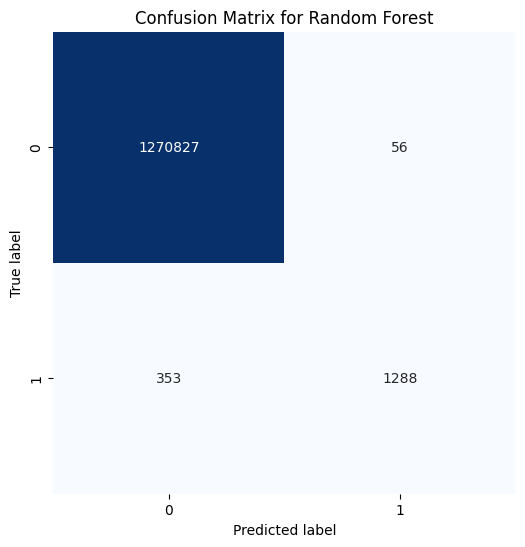

Models Progress:  40%|████      | 2/5 [00:21<00:36, 12.21s/it]

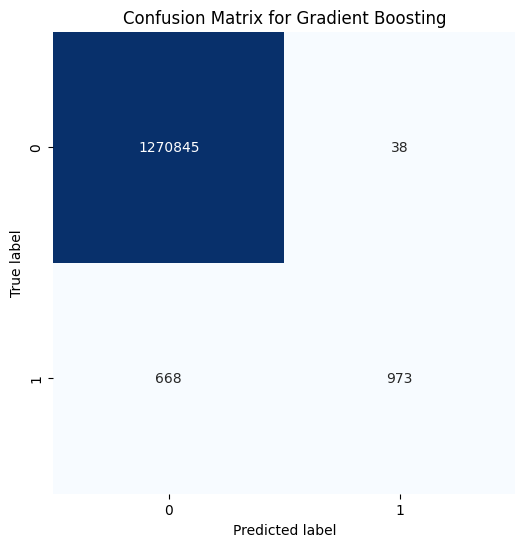

Models Progress:  60%|██████    | 3/5 [00:23<00:15,  7.74s/it]

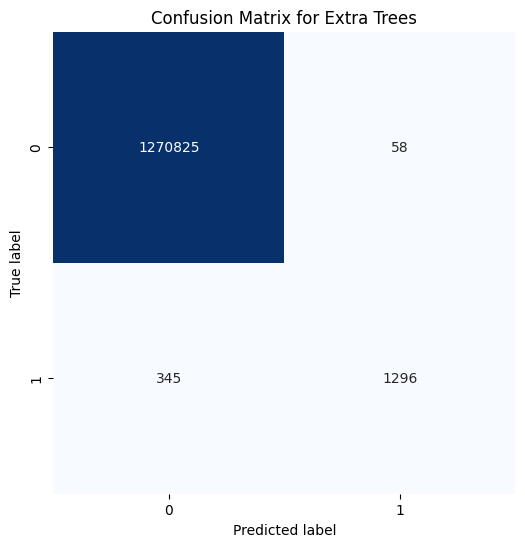

Models Progress:  80%|████████  | 4/5 [00:43<00:12, 12.40s/it]

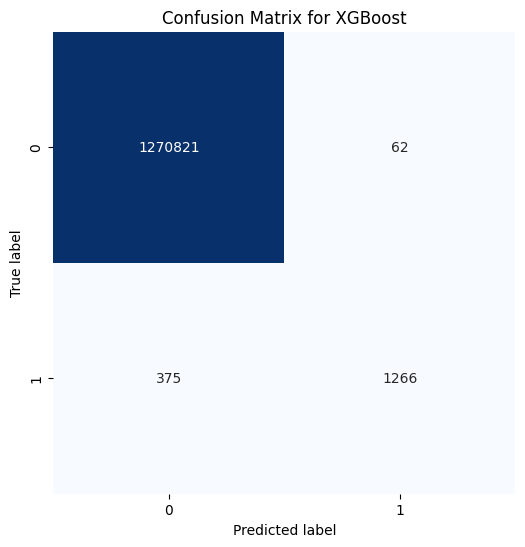

Models Progress: 100%|██████████| 5/5 [00:47<00:00,  9.52s/it]


In [24]:
for name, model in tqdm(models.items(), desc='Models Progress'):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size as needed
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

In [26]:
# save descision tree as pickle

import pickle

# Selecting only the Decision Tree model
model = models['Decision Tree']

# Save the model to a pickle file
with open('/content/drive/MyDrive/fraud/model.pkl', 'wb') as file:
  pickle.dump(model, file)
